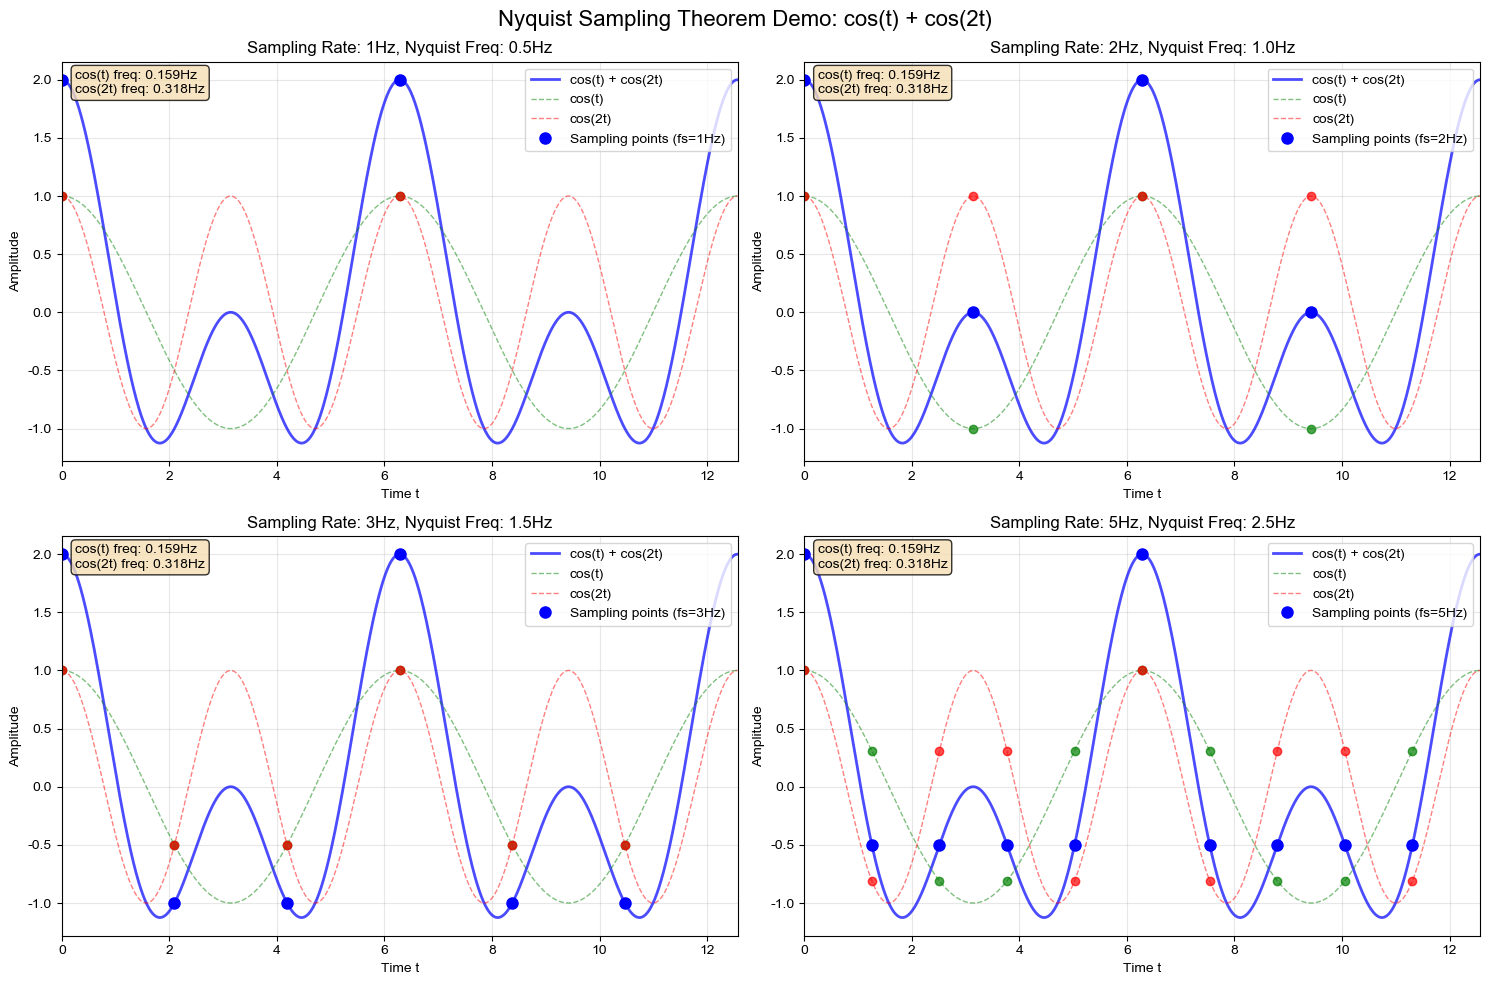

CRITICAL CASE: 1Hz SAMPLING RATE ANALYSIS

When sampling rate = 1Hz:
- Nyquist frequency = 0.5Hz = 0.5Hz
- cos(t) frequency = 0.159Hz ≈ 0.159Hz
- cos(2t) frequency = 0.318Hz ≈ 0.318Hz

Sampling interval: 6.283 (i.e., 2π)
Sampling analysis:
--------------------------------------------------
t =  0.00 (0×2π): cos(t) =  1.000, cos(2t) =  1.000
                    cos(t)+cos(2t) =  2.000
                    2cos(t) =  2.000
                    IDENTICAL: True

t =  6.28 (1×2π): cos(t) =  1.000, cos(2t) =  1.000
                    cos(t)+cos(2t) =  2.000
                    2cos(t) =  2.000
                    IDENTICAL: True

t = 12.57 (2×2π): cos(t) =  1.000, cos(2t) =  1.000
                    cos(t)+cos(2t) =  2.000
                    2cos(t) =  2.000
                    IDENTICAL: True

t = 18.85 (3×2π): cos(t) =  1.000, cos(2t) =  1.000
                    cos(t)+cos(2t) =  2.000
                    2cos(t) =  2.000
                    IDENTICAL: True

MATHEMATICAL EXPLANATION:
At 

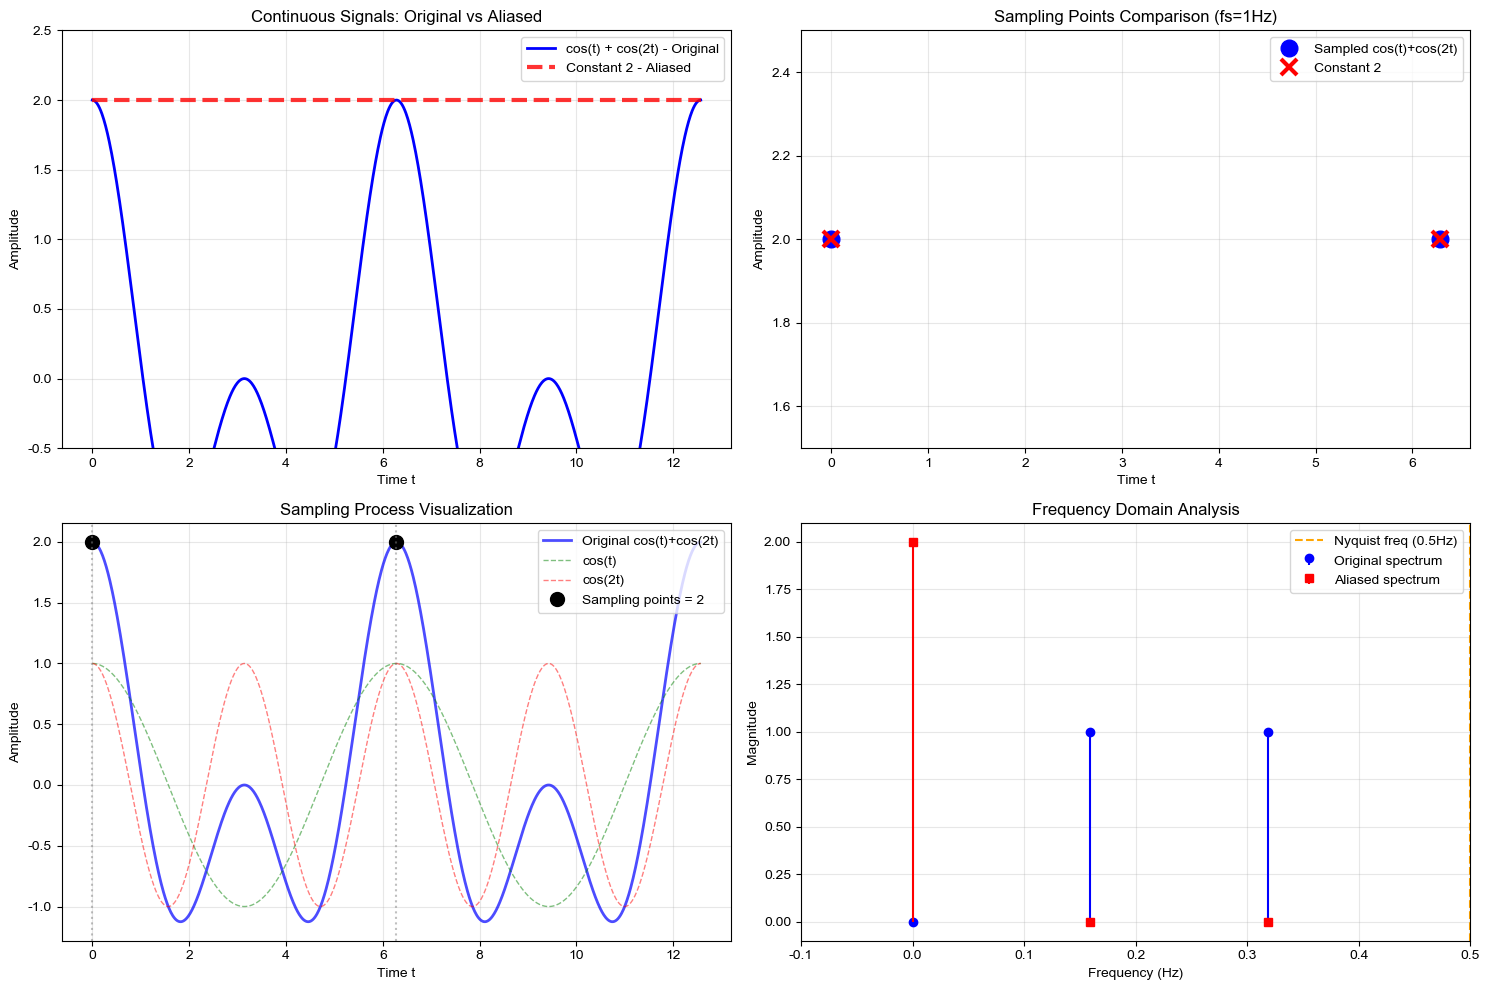


Numerical Verification at 1Hz sampling:
Sampling points (every 2π):
--------------------------------------------------
t =  0.000 (0×2π):
  cos(t) = cos(0×2π) = 1.000
  cos(2t) = cos(0×2π) = 1.000
  cos(t) + cos(2t) = 2.000

t =  6.283 (1×2π):
  cos(t) = cos(1×2π) = 1.000
  cos(2t) = cos(2×2π) = 1.000
  cos(t) + cos(2t) = 2.000

KEY INSIGHT:
At 1Hz sampling rate (every 2π), both cos(t) and cos(2t) equal 1
Therefore: cos(t) + cos(2t) = 1 + 1 = 2 (constant!)
The complex oscillating signal appears as a simple constant!
This is severe aliasing - all oscillatory information is lost!


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 设置字体 - 避免中文字体警告
import matplotlib
try:
    # 尝试设置中文字体
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'Helvetica', 'Arial']
    plt.rcParams['axes.unicode_minus'] = False
except:
    # 如果中文字体不可用，使用英文
    plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

def nyquist_sampling_demo():
    # 时间范围
    t_continuous = np.linspace(0, 4*np.pi, 1000)  # 连续时间信号
    
    # 原始信号: cos(t) + cos(2t)
    original_signal = np.cos(t_continuous) + np.cos(2*t_continuous)
    
    # 分解的信号
    cos_t = np.cos(t_continuous)
    cos_2t = np.cos(2*t_continuous)
    
    # 不同的采样率
    sampling_rates = [1, 2, 3, 5]  # Hz - 重点关注1Hz的情况
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Nyquist Sampling Theorem Demo: cos(t) + cos(2t)', fontsize=16, fontweight='bold')
    
    for i, fs in enumerate(sampling_rates):
        ax = axes[i//2, i%2]
        
        # 采样时间点
        dt = 2*np.pi / fs  # 采样间隔
        t_sampled = np.arange(0, 4*np.pi, dt)
        
        # 采样后的信号值
        sampled_signal = np.cos(t_sampled) + np.cos(2*t_sampled)
        sampled_cos_t = np.cos(t_sampled)
        sampled_cos_2t = np.cos(2*t_sampled)
        
        # 绘制连续信号
        ax.plot(t_continuous, original_signal, 'b-', linewidth=2, alpha=0.7, label='cos(t) + cos(2t)')
        ax.plot(t_continuous, cos_t, 'g--', linewidth=1, alpha=0.5, label='cos(t)')
        ax.plot(t_continuous, cos_2t, 'r--', linewidth=1, alpha=0.5, label='cos(2t)')
        
        # 绘制采样点
        ax.plot(t_sampled, sampled_signal, 'bo', markersize=8, label=f'Sampling points (fs={fs}Hz)')
        ax.plot(t_sampled, sampled_cos_t, 'go', markersize=6, alpha=0.7)
        ax.plot(t_sampled, sampled_cos_2t, 'ro', markersize=6, alpha=0.7)
        
        # 计算奈奎斯特频率
        nyquist_freq = fs / 2
        
        ax.set_title(f'Sampling Rate: {fs}Hz, Nyquist Freq: {nyquist_freq}Hz')
        ax.set_xlabel('Time t')
        ax.set_ylabel('Amplitude')
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_xlim(0, 4*np.pi)
        
        # 添加频率信息
        ax.text(0.02, 0.98, f'cos(t) freq: {1/(2*np.pi):.3f}Hz\ncos(2t) freq: {2/(2*np.pi):.3f}Hz', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # 详细分析采样率为1Hz的情况
    print("="*60)
    print("CRITICAL CASE: 1Hz SAMPLING RATE ANALYSIS")
    print("="*60)
    
    fs_critical = 1  # Hz - 这里是关键！
    print(f"\nWhen sampling rate = {fs_critical}Hz:")
    print(f"- Nyquist frequency = {fs_critical/2}Hz = 0.5Hz")
    print(f"- cos(t) frequency = {1/(2*np.pi):.3f}Hz ≈ 0.159Hz")
    print(f"- cos(2t) frequency = {2/(2*np.pi):.3f}Hz ≈ 0.318Hz")
    
    # 采样演示
    dt = 2*np.pi / fs_critical  # 采样间隔 = 2π
    t_sample = np.arange(0, 8*np.pi, dt)
    
    print(f"\nSampling interval: {dt:.3f} (i.e., 2π)")
    print("Sampling analysis:")
    print("-" * 50)
    for i, t in enumerate(t_sample[:6]):
        cos_t_val = np.cos(t)
        cos_2t_val = np.cos(2*t)
        sum_val = cos_t_val + cos_2t_val
        double_cos_val = 2*cos_t_val
        print(f"t = {t:5.2f} ({t/(2*np.pi):.0f}×2π): cos(t) = {cos_t_val:6.3f}, cos(2t) = {cos_2t_val:6.3f}")
        print(f"                    cos(t)+cos(2t) = {sum_val:6.3f}")
        print(f"                    2cos(t) = {double_cos_val:6.3f}")
        print(f"                    IDENTICAL: {abs(sum_val - double_cos_val) < 1e-10}")
        print()
    
    print("MATHEMATICAL EXPLANATION:")
    print("At sampling points t = n×2π (n=0,1,2,...):")
    print("- cos(t) = cos(n×2π) = 1")
    print("- cos(2t) = cos(n×4π) = 1")
    print("- cos(t) + cos(2t) = 1 + 1 = 2")
    print("- 2cos(t) = 2×1 = 2")
    print("\nResult: cos(t)+cos(2t) ≡ 2cos(t) at ALL sampling points!")
    print("This is PERFECT ALIASING at 1Hz sampling rate!")

def demonstrate_aliasing():
    """Demonstrate critical aliasing: cos(t)+cos(2t) vs 2cos(t) at 1Hz sampling"""
    print("\n" + "="*60)
    print("CRITICAL ALIASING DEMONSTRATION - 1Hz SAMPLING")
    print("cos(t)+cos(2t) becomes indistinguishable from 2cos(t)")
    print("="*60)
    
    # 时间范围
    t_continuous = np.linspace(0, 4*np.pi, 1000)
    
    # 原始信号
    original_signal = np.cos(t_continuous) + np.cos(2*t_continuous)
    # 混叠后看起来像的信号 - 实际上是常数2！
    aliased_signal = 2 * np.ones_like(t_continuous)  # 因为在采样点都是2
    
    # 采样率1Hz - 关键情况
    fs = 1
    dt = 2*np.pi / fs  # 采样间隔 = 2π
    t_sampled = np.arange(0, 4*np.pi, dt)
    
    # 采样值
    sampled_original = np.cos(t_sampled) + np.cos(2*t_sampled)
    sampled_constant = 2 * np.ones_like(t_sampled)
    
    plt.figure(figsize=(15, 10))
    
    # 第一个子图：连续信号对比
    plt.subplot(2, 2, 1)
    plt.plot(t_continuous, original_signal, 'b-', linewidth=2, label='cos(t) + cos(2t) - Original')
    plt.plot(t_continuous, aliased_signal, 'r--', linewidth=3, alpha=0.8, label='Constant 2 - Aliased')
    plt.title('Continuous Signals: Original vs Aliased')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.5, 2.5)
    
    # 第二个子图：采样点对比
    plt.subplot(2, 2, 2)
    plt.plot(t_sampled, sampled_original, 'bo', markersize=12, label='Sampled cos(t)+cos(2t)')
    plt.plot(t_sampled, sampled_constant, 'rx', markersize=12, markeredgewidth=3, label='Constant 2')
    plt.title('Sampling Points Comparison (fs=1Hz)')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(1.5, 2.5)
    
    # 第三个子图：显示采样过程
    plt.subplot(2, 2, 3)
    plt.plot(t_continuous, original_signal, 'b-', linewidth=2, alpha=0.7, label='Original cos(t)+cos(2t)')
    plt.plot(t_continuous, np.cos(t_continuous), 'g--', linewidth=1, alpha=0.5, label='cos(t)')
    plt.plot(t_continuous, np.cos(2*t_continuous), 'r--', linewidth=1, alpha=0.5, label='cos(2t)')
    plt.plot(t_sampled, sampled_original, 'ko', markersize=10, label='Sampling points = 2')
    # 添加垂直线显示采样时刻
    for t_s in t_sampled:
        plt.axvline(x=t_s, color='gray', linestyle=':', alpha=0.5)
    plt.title('Sampling Process Visualization')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 第四个子图：频域分析
    plt.subplot(2, 2, 4)
    freq = np.array([0, 1/(2*np.pi), 2/(2*np.pi)])
    original_spectrum = np.array([0, 1, 1])  # cos(t) + cos(2t)的频谱
    aliased_spectrum = np.array([2, 0, 0])   # 采样后看起来像直流
    
    plt.stem(freq, original_spectrum, linefmt='b-', markerfmt='bo', basefmt=' ', label='Original spectrum')
    plt.stem(freq, aliased_spectrum, linefmt='r-', markerfmt='rs', basefmt=' ', label='Aliased spectrum')
    plt.axvline(x=0.5, color='orange', linestyle='--', label='Nyquist freq (0.5Hz)')
    plt.title('Frequency Domain Analysis')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(-0.1, 0.5)
    
    plt.tight_layout()
    plt.show()
    
    # 数值验证
    print("\nNumerical Verification at 1Hz sampling:")
    print("Sampling points (every 2π):")
    print("-" * 50)
    for i, t_val in enumerate(t_sampled[:6]):
        cos_t = np.cos(t_val)
        cos_2t = np.cos(2*t_val)
        orig_val = cos_t + cos_2t
        print(f"t = {t_val:6.3f} ({t_val/(2*np.pi):.0f}×2π):")
        print(f"  cos(t) = cos({t_val/(2*np.pi):.0f}×2π) = {cos_t:.3f}")
        print(f"  cos(2t) = cos({2*t_val/(2*np.pi):.0f}×2π) = {cos_2t:.3f}")
        print(f"  cos(t) + cos(2t) = {orig_val:.3f}")
        print()
    
    print("KEY INSIGHT:")
    print("At 1Hz sampling rate (every 2π), both cos(t) and cos(2t) equal 1")
    print("Therefore: cos(t) + cos(2t) = 1 + 1 = 2 (constant!)")
    print("The complex oscillating signal appears as a simple constant!")
    print("This is severe aliasing - all oscillatory information is lost!")

# 运行演示
if __name__ == "__main__":
    nyquist_sampling_demo()
    demonstrate_aliasing()

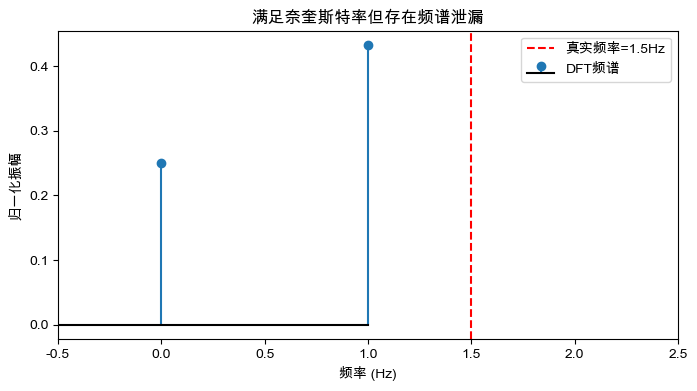

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- 1. 参数设置 ----------------------
f = 1.5       # 信号频率（1.5Hz，非整周期采样）
sr = 4        # 采样率（满足奈奎斯特：sr > 2f=3Hz）
duration = 1  # 采样时长1秒（包含1.5个周期）
n = int(sr * duration)  # 采样点数=4

# ---------------------- 2. 生成信号与DFT ----------------------
t = np.linspace(0, duration, n, endpoint=False)
x = np.cos(2 * np.pi * f * t)  # 余弦信号
X = np.fft.fft(x) / n          # 归一化FFT
freq = np.fft.fftfreq(n, 1/sr) # 频率轴（Hz）

# ---------------------- 3. 绘制频谱 ----------------------
plt.figure(figsize=(8, 4))
plt.stem(freq, np.abs(X), basefmt='k-', label='DFT频谱')
plt.axvline(f, color='red', linestyle='--', label=f'真实频率={f}Hz')
plt.xlim(-0.5, 2.5)  # 聚焦正低频区域
plt.xlabel('频率 (Hz)')
plt.ylabel('归一化振幅')
plt.title('满足奈奎斯特率但存在频谱泄漏')
plt.legend()
plt.show()

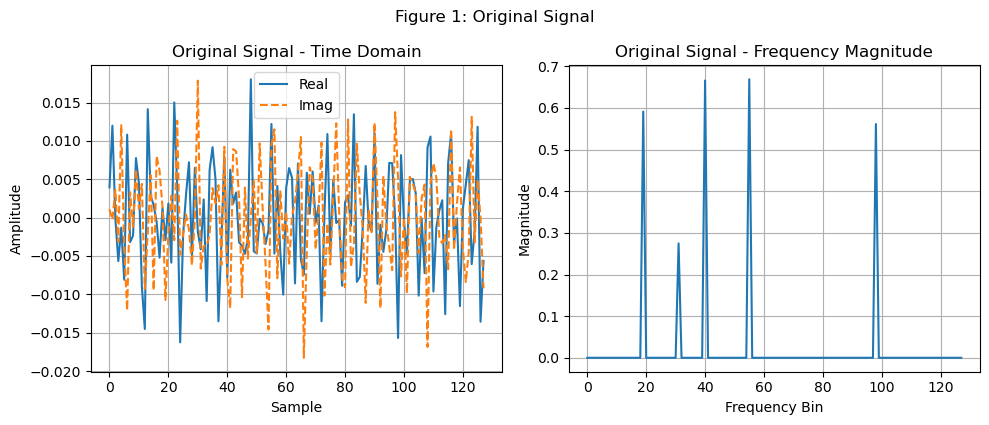

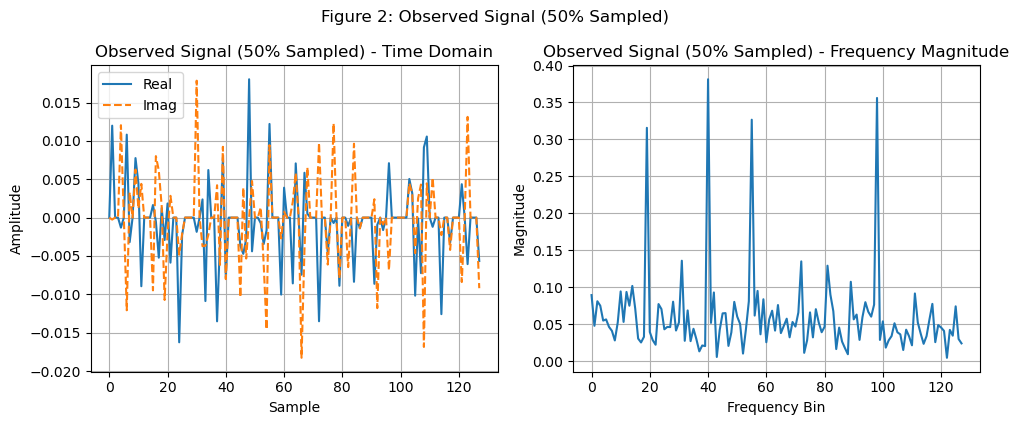

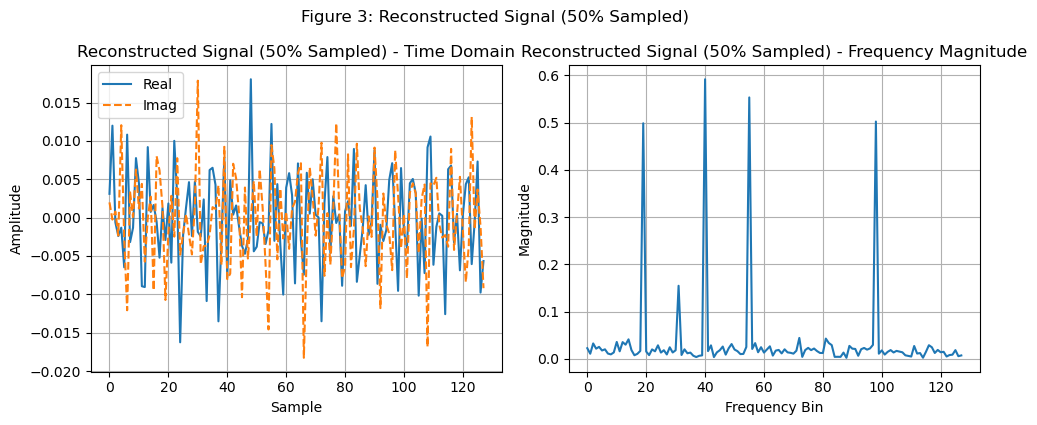

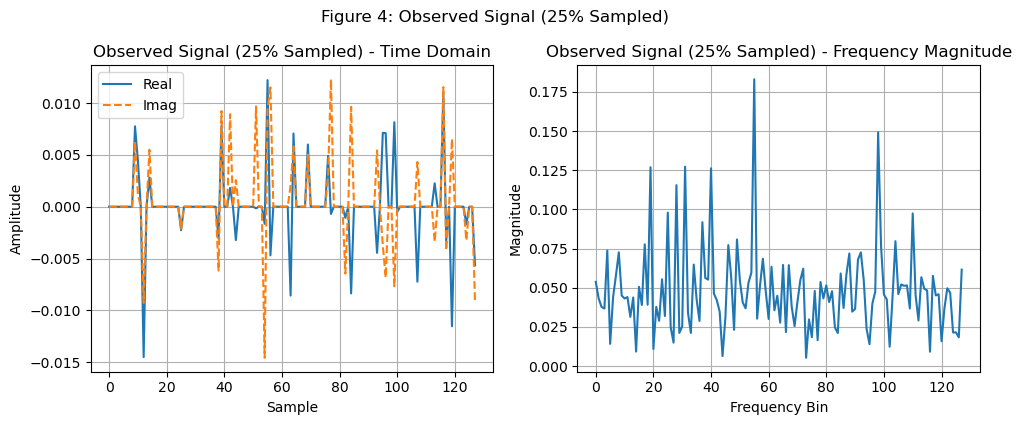

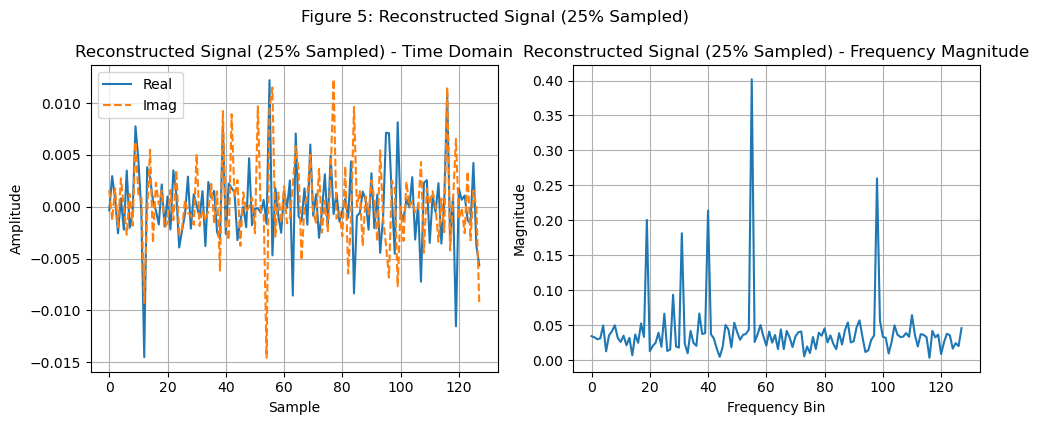

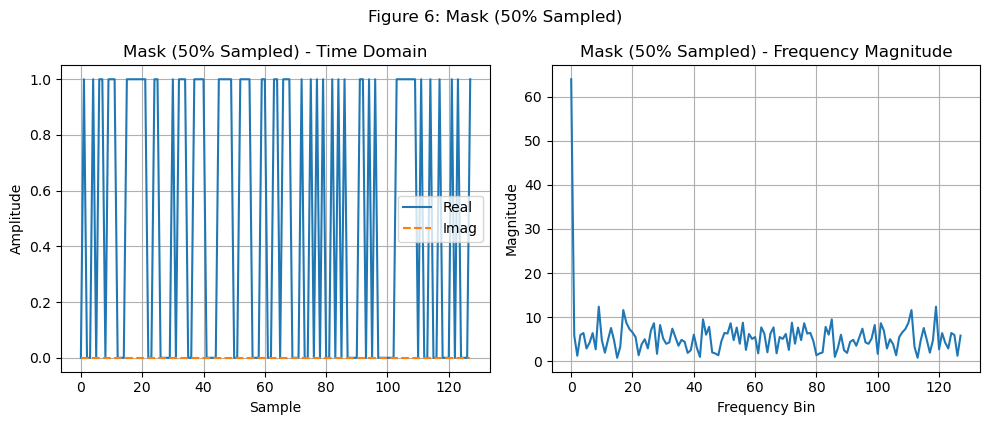

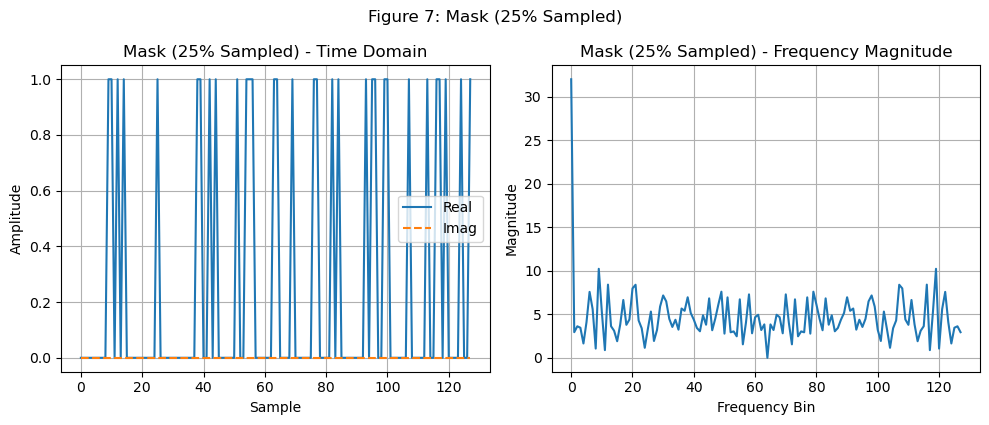

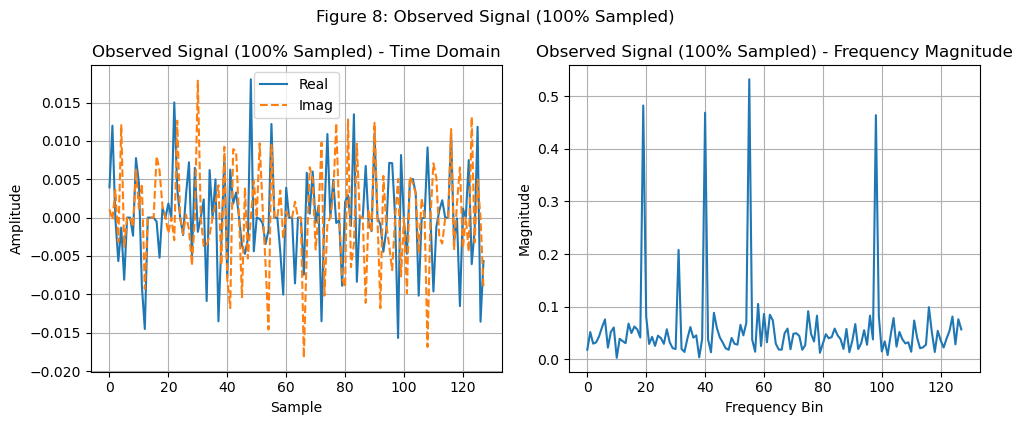

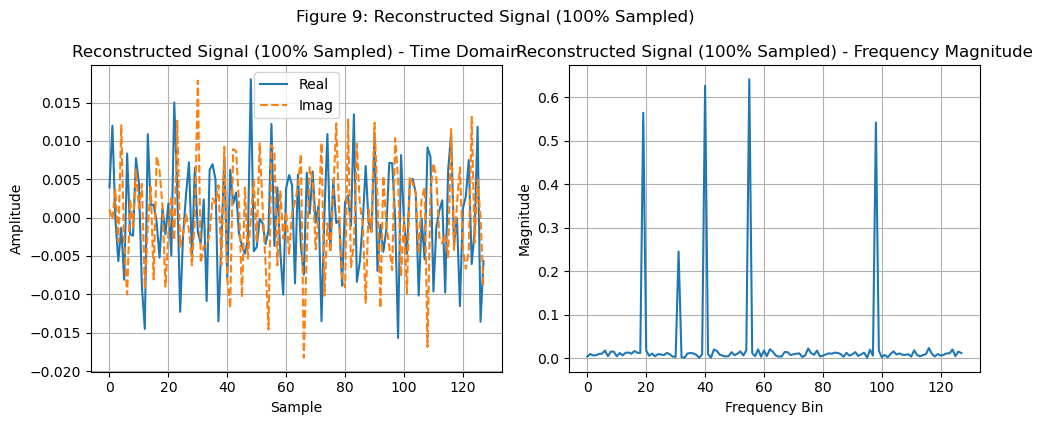

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. 创建频域稀疏信号 ----------
N = 128
K = 5
np.random.seed(42)
X_freq = np.zeros(N, dtype=np.complex128)
nonzero_indices = np.random.choice(N, size=K, replace=False)
amps = np.random.rand(K)
phases = np.random.rand(K) * 2 * np.pi
X_freq[nonzero_indices] = amps * np.exp(1j * phases)
x_time = np.fft.ifft(X_freq)

# ---------- 2. 欠采样函数和重建函数 ----------
def generate_observation(x_time, num_samples):
    indices = np.random.choice(N, size=num_samples, replace=False)
    mask = np.zeros(N, dtype=bool)
    mask[indices] = True
    observed = np.zeros_like(x_time)
    observed[mask] = x_time[mask]
    return observed, mask

def soft_threshold(X, lam):
    mag = np.abs(X)
    shrink = np.where(mag > lam, (mag - lam) / mag, 0)
    return X * shrink

def iterative_reconstruct(observed, mask, lam=0.1, num_iters=10):
    x_est = observed.copy()
    for i in range(num_iters):
        X_est = np.fft.fft(x_est)
        X_est = soft_threshold(X_est, lam)
        x_est = np.fft.ifft(X_est)
        x_est[mask] = observed[mask]
    return x_est

# ---------- 3. 采样并重建 ----------
observed_50, mask_50 = generate_observation(x_time, 64)
recon_50 = iterative_reconstruct(observed_50, mask_50)

observed_25, mask_25 = generate_observation(x_time, 32)
recon_25 = iterative_reconstruct(observed_25, mask_25)

observed_100, mask_100 = generate_observation(x_time, 100)
recon_100 = iterative_reconstruct(observed_100, mask_100)

# ---------- 4. 绘图 ----------
def plot_signal_and_spectrum(signal, title_prefix, index):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(signal.real, label='Real')
    plt.plot(signal.imag, label='Imag', linestyle='--')
    plt.title(f"{title_prefix} - Time Domain")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    spectrum = np.fft.fft(signal)
    plt.plot(np.abs(spectrum))
    plt.title(f"{title_prefix} - Frequency Magnitude")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.suptitle(f"Figure {index}: {title_prefix}", y=1.05)
    plt.show()

# 原始信号
plot_signal_and_spectrum(x_time, "Original Signal", 1)

# 50%采样观测
plot_signal_and_spectrum(observed_50, "Observed Signal (50% Sampled)", 2)

# 50%重建
plot_signal_and_spectrum(recon_50, "Reconstructed Signal (50% Sampled)", 3)

# 25%采样观测
plot_signal_and_spectrum(observed_25, "Observed Signal (25% Sampled)", 4)

# 25%重建
plot_signal_and_spectrum(recon_25, "Reconstructed Signal (25% Sampled)", 5)

# mask可视化
plot_signal_and_spectrum(mask_50.astype(float), "Mask (50% Sampled)", 6)
plot_signal_and_spectrum(mask_25.astype(float), "Mask (25% Sampled)", 7)

# 100%采样观测
plot_signal_and_spectrum(observed_100, "Observed Signal (100% Sampled)", 8)
# 100%重建
plot_signal_and_spectrum(recon_100, "Reconstructed Signal (100% Sampled)", 9)
